In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Exploratory Data Analysis

In [ ]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.')

Shape of the data: (1338, 7)
There are 1338 rows in the data.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# What are the different datatypes present in the data?
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
# Let's checkout individual columns:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Transform the Index object to a series, and grouping by data types:
g = data.columns.to_series().groupby(data.dtypes).groups
g

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [ ]:
data.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [ ]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
import matplotlib.pyplot as plt
import seaborn as sns

def summary(x, data):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)

    print(f'5-Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1 (25%)               : {Q1}\n'
          f'Q2 (Median)            : {Q2}\n'
          f'Q3 (75%)               : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    plt.subplots_adjust(hspace=0.4)
    sns.set_palette('pastel')

    # Density Distribution
    sns.histplot(data[x], kde=True, color='r', ax=axes[0, 0])
    axes[0, 0].set_title(f'{x.capitalize()} Density Distribution')

    # Violin Plot
    sns.violinplot(x=data[x], palette='Accent', ax=axes[0, 1])
    axes[0, 1].set_title(f'{x.capitalize()} Violinplot')

    # Box Plot
    sns.boxplot(x=data[x], palette='cool', width=0.7, linewidth=0.6, ax=axes[1, 0])
    axes[1, 0].set_title(f'{x.capitalize()} Boxplot')

    # Cumulative Density Plot
    sns.kdeplot(data[x], cumulative=True, ax=axes[1, 1])
    axes[1, 1].set_title(f'{x.capitalize()} Cumulative Density Distribution')

    plt.tight_layout()
    plt.show()


In [ ]:
def box_plot(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y):
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.2f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = data.boxplot(column = x,
                             grid=True,
                             figsize=(4, 8),
                             ax=axes,
                             vert = True,
                             notch=False,
                             widths = 0.7,
                             showmeans = True,
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.capitalize()} Boxplot', fontsize=16)
    plt.ylabel(f'{x.capitalize()}', fontsize=14)
    plt.show()

    skew = data[x].skew()
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[x] < (Q1 - 1.5 * IQR)) | (data[x] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {x.capitalize()} = {data[x].mean()}')
    print(f'Median {x.capitalize()} = {data[x].median()}')
    print(f'Skewness of {x}: {skew}.')
    print(f'Total number of outliers in {x} distribution: {total_outlier_num}.')

5-Point Summary of Age Attribute:
Age(min) : 18
Q1 (25%)               : 27.0
Q2 (Median)            : 39.0
Q3 (75%)               : 51.0
Age(max) : 64


<ipython-input-33-c9823ab1ed79>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[x], palette='Accent', ax=axes[0, 1])
<ipython-input-33-c9823ab1ed79>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[x], palette='cool', width=0.7, linewidth=0.6, ax=axes[1, 0])


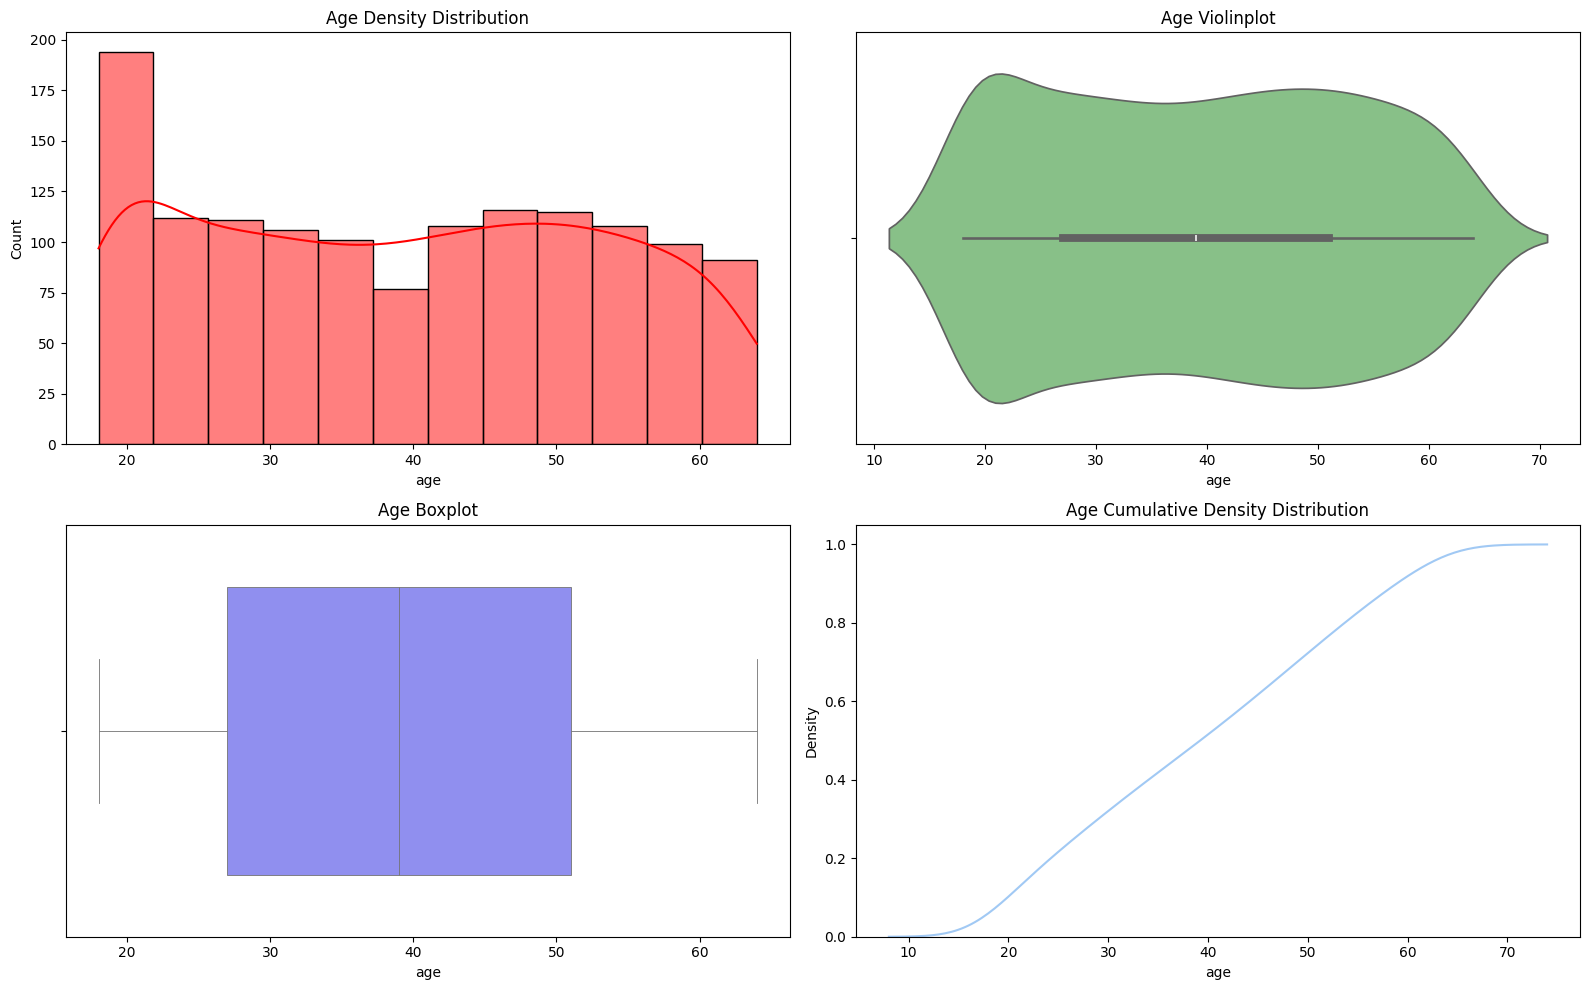

In [ ]:
summary('age', data)

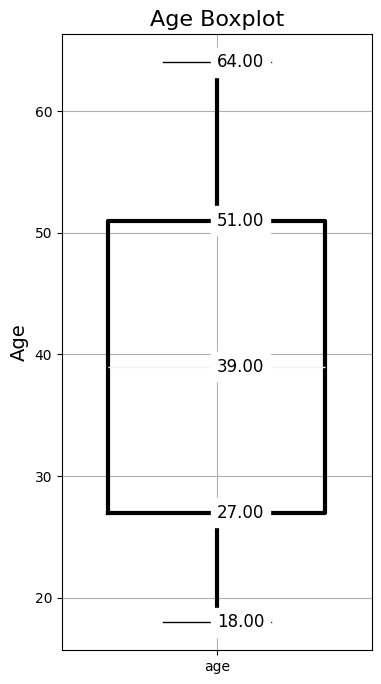

Mean Age = 39.20702541106129
Median Age = 39.0
Skewness of age: 0.05567251565299186.
Total number of outliers in age distribution: 0.


In [ ]:
box_plot('age')

In [ ]:
#Observations:
#The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, and with lowest age being 18 and highest being 64.
#There are no outlier values in the Age distribution in the data.

5-Point Summary of Bmi Attribute:
Bmi(min) : 15.96
Q1 (25%)               : 26.29625
Q2 (Median)            : 30.4
Q3 (75%)               : 34.69375
Bmi(max) : 53.13


<ipython-input-33-c9823ab1ed79>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[x], palette='Accent', ax=axes[0, 1])
<ipython-input-33-c9823ab1ed79>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[x], palette='cool', width=0.7, linewidth=0.6, ax=axes[1, 0])


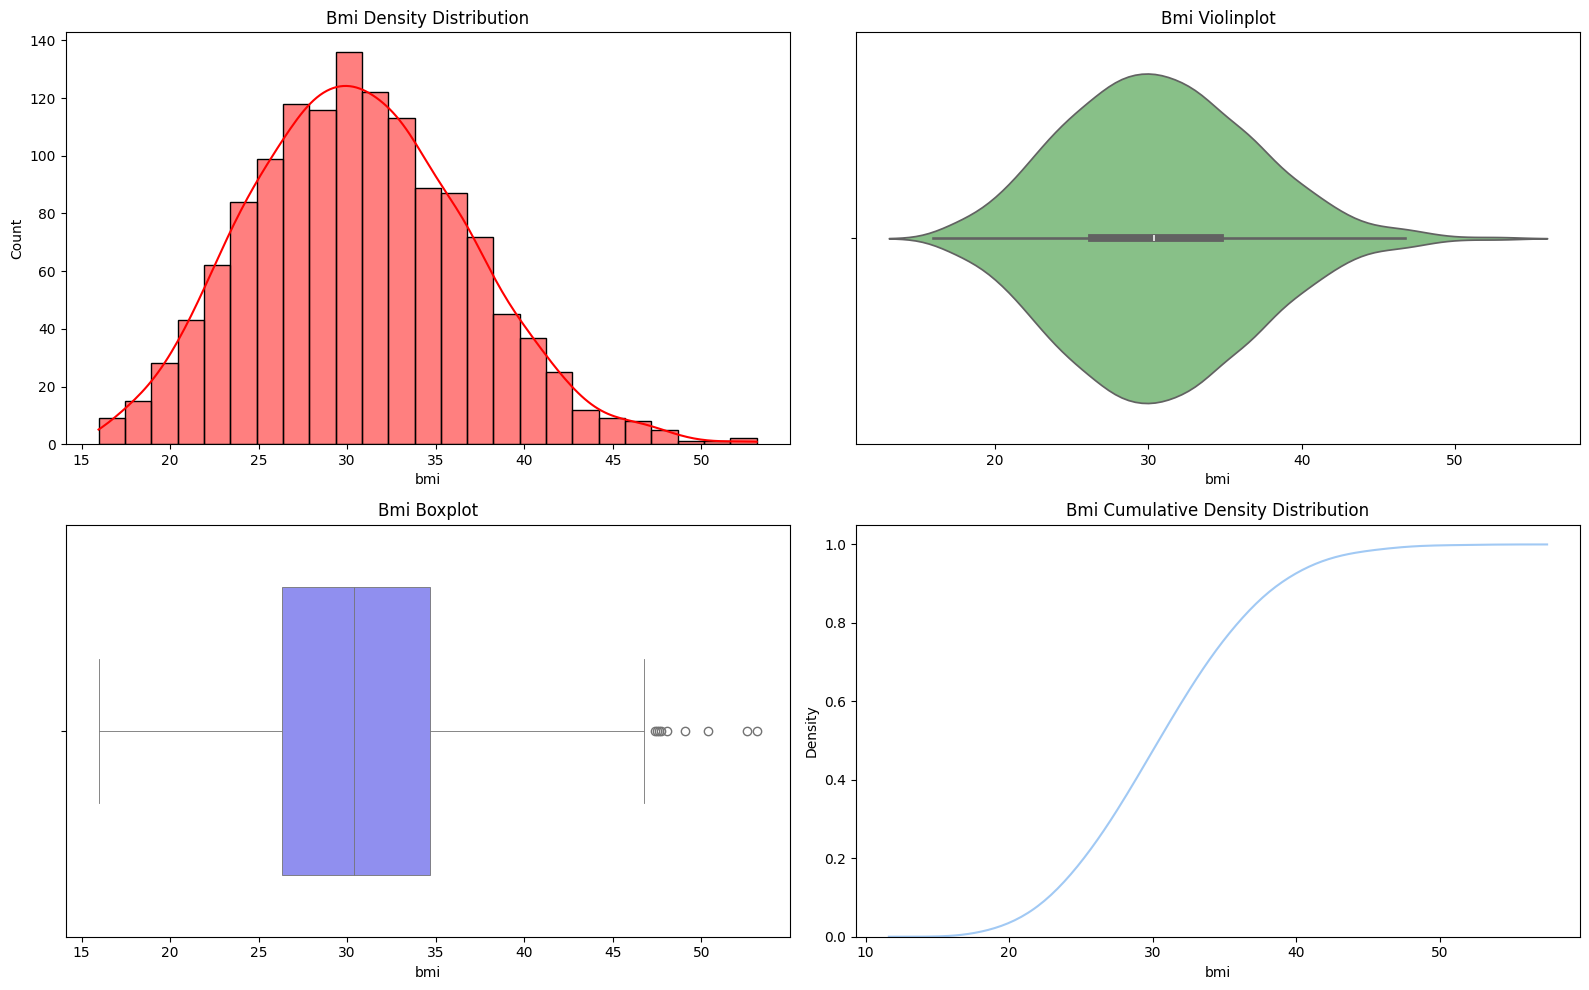

In [ ]:
summary('bmi' ,data)

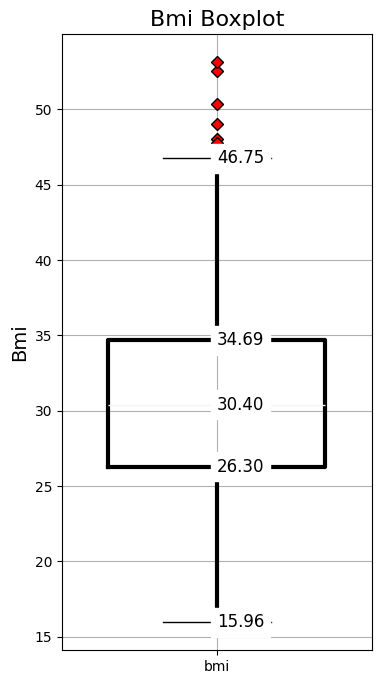

Mean Bmi = 30.66339686098655
Median Bmi = 30.4
Skewness of bmi: 0.2840471105987448.
Total number of outliers in bmi distribution: 9.


In [ ]:
box_plot('bmi')

In [ ]:
#Observations:
#The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.
#The person with the highest BMI (least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) He is paying less premium than the mean, but significantly more than the median charges. This is in line with our basic understanding of underwriting rules.

5-Point Summary of Charges Attribute:
Charges(min) : 1121.8739
Q1 (25%)               : 4740.28715
Q2 (Median)            : 9382.033
Q3 (75%)               : 16639.912515
Charges(max) : 63770.42801


<ipython-input-33-c9823ab1ed79>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[x], palette='Accent', ax=axes[0, 1])
<ipython-input-33-c9823ab1ed79>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[x], palette='cool', width=0.7, linewidth=0.6, ax=axes[1, 0])


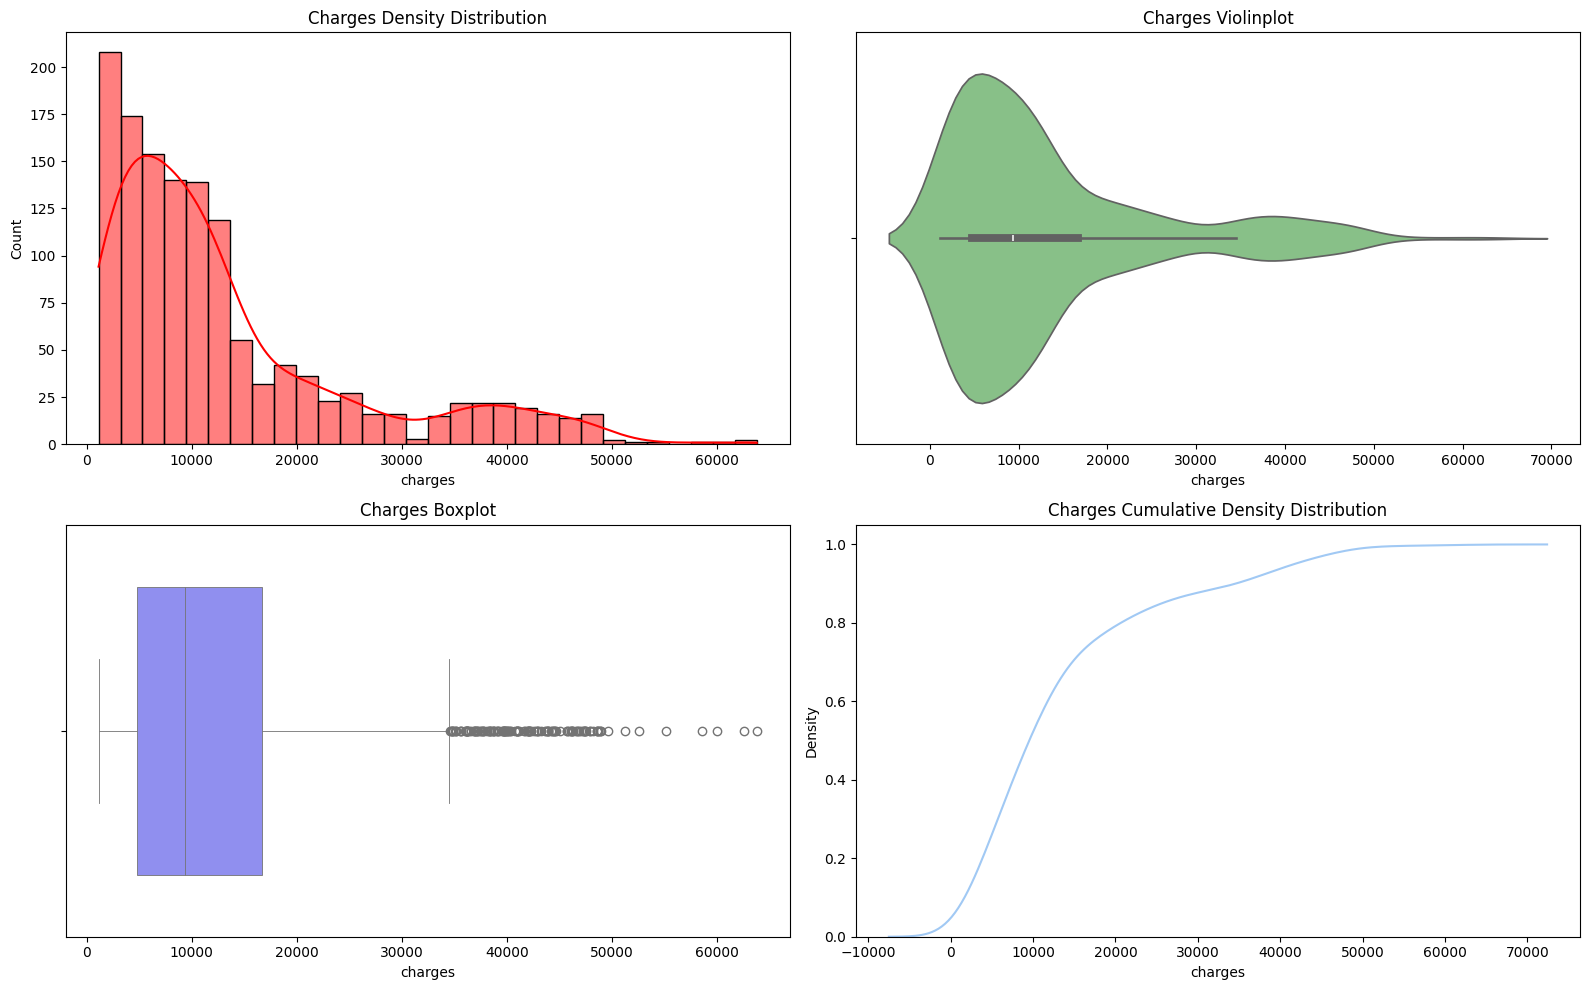

In [ ]:
summary('charges' ,data)

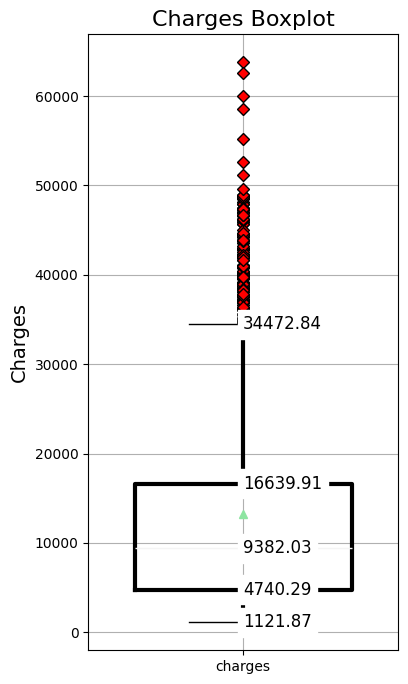

Mean Charges = 13270.422265141257
Median Charges = 9382.033
Skewness of charges: 1.5158796580240388.
Total number of outliers in charges distribution: 139.


In [ ]:
box_plot('charges')

In [ ]:
#Observations:
#The Charges distribution of the Insured is heavily skewed to the left (median < mean) with a Mean of 13270.4223 and Median of 9382.033. The lowest charged amount is 1121.8739 and the highest charged amount is 63770.42801.
#Out of a total of 1338 data points, there are a total of 139 outlier values in the distribution of charges, all in the higher side. The highest charges paid is 63770.42801.
#The insured chared with highest premium is a 54 years old female smoker with relatively high BMI (indicating obesity).
#The person with the highest BMI (obese, or least healthy, based on available data) is also one of the youngest (male, 18, non-smoker.) He is paying less premium charges than the mean(which, we note, is affected by extreme outlier values of charges like the person above), but significantly more than the median. This is in line with our basic understanding of underwriting rules.

In [ ]:
data['charges'].groupby(data['smoker']).mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<Axes: xlabel='smoker', ylabel='charges'>

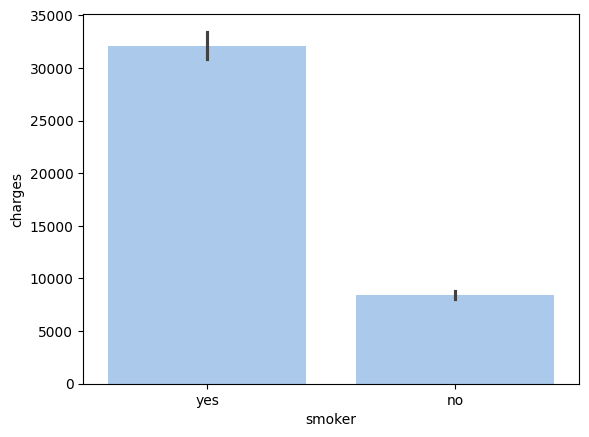

In [ ]:
sns.barplot(x = "smoker", y = "charges", data = data)

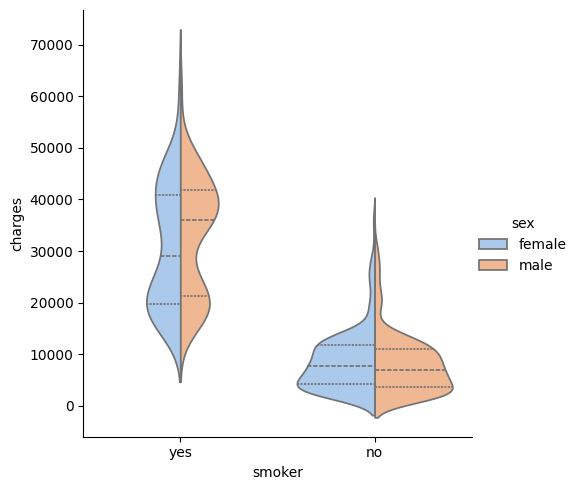

In [ ]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=data);

In [ ]:
data.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

In [ ]:
#Observations:
#Of the total 1338 insured, 274 (20.5%) are smokers and the rest are non-smokers.
#Among 274 smokers, proportion of males (159) are higher than females (115).
#The average insurance premium for smokers are significantly higher than non-smokers.